In [1]:
## Import topopy modules
import sys
sys.path.append("D:/Usuario/Documents/github/topopy/src")

## Tutorial 4. Create channels from a polyline shapefile

In this tutorial we will use the previously created Network object to create two main channels for the extracted basins and see the different profiles. 


In [2]:
# Change the tutorial folder to get the data
# Change according the location of "topopy/tests/data"
import os
os.chdir("../tests/data")

### 1. Load a previously created Network object

To load a previously created Network object (saved as *.dat file), simply call the Network class with the path as unique attribute

In [18]:
from topopy import Network

# Load a previously saved Network object. 
net = Network("out/jebja_net1000.dat")

### 2. Create a vectorial drainage network with continous channels

We will create a vector drainage network with continous channels, open it in QGIS and extract the main channels for the principal basins. 


In [19]:
# We created the network (vector format)
net.export_to_shp("out/network.shp", True)

Open the shapefile in QGIS and select the main channels for the two principal drainage basins. As "continous channel" options was selected, it is easier to select the polylines corresponding to these channels.
![image](images/select_polylines.jpg)

Export these lines to a new shapefile, start editing and merge contigous segments. The ouput shapefile must contain only two polylines, corresponding to the main channels selected. Create a field **id** and a **name** field if desired. Give ids and names to both channels.

Save the polyline shapefile as **selected_rivers.shp** and place it in the **out** folder.

To get channels objects from a polyline we can use the function `shp_to_channels()` from topopy. This function takes first and last vertex of the polyline and extracts the channel. 

>- `shp_to_channels(path, net, id_field="", name_field="")`
    - `path` (str) Path to the polyline shapefile
    - `net` (Network) Network instance
    - `id_field` (str) Field with channel ids
    - `name_field` (str) Field with channel names



2

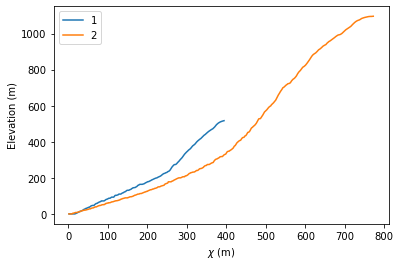

In [20]:
from topopy import shp_to_channels
import matplotlib.pyplot as plt

canales = shp_to_channels("out/selected_rivers.shp", net, "id")

# Plot both channels in a Chi profile
fig, ax = plt.subplots()
for canal in canales:
    zi = canal.get_z()
    chi = canal.get_chi()
    ax.plot(chi, zi, label=canal.get_oid())

ax.set_xlabel("$\\chi$ (m)")
ax.set_ylabel("Elevation (m)")
ax.legend()